In [62]:
import pandas as pd
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from pandas.plotting import table
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['Measurements', 'Stations']

In [63]:
Measurement = Base.classes.Measurements
Station = Base.classes.Stations

session = Session(engine)

In [67]:
prev_year = dt.date.today() - dt.timedelta(days=365)
precipa = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

In [71]:
rain = pd.DataFrame(precipa, columns=['date', 'prcp'])
rain = rain.set_index('date')


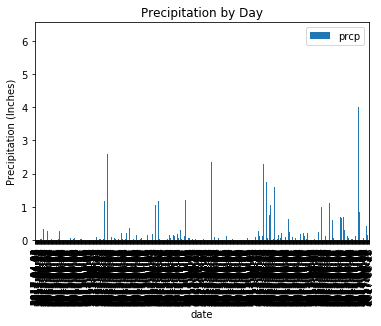

In [75]:
rain.plot(kind="bar")

plt.xticks
plt.title("Precipitation by Day")
plt.ylabel("Precipitation (Inches)")
plt.savefig("Precipitation_by_day")
plt.show()

In [76]:
Station_details = session.query(Station.station, Station.name, func.count(Measurement.date)). \
    filter(Station.station == Measurement.station).\
    group_by(Station.name).order_by(func.count(Measurement.date).desc()).all()

Station_details

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2696),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2685),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2572),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2484),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 1937),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1932),
 ('USC00517948', 'PEARL CITY, HI US', 683),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 342)]

In [79]:
high_tobs = session.query(Measurement.date, Measurement.tobs).order_by(Measurement.id.desc()). \
    filter(Measurement.station == 'USC00519281').limit(365).all()
    
high_tobs

[('2017-08-18', 79),
 ('2017-08-17', 76),
 ('2017-08-16', 76),
 ('2017-08-15', 77),
 ('2017-08-14', 77),
 ('2017-08-13', 77),
 ('2017-08-06', 83),
 ('2017-08-05', 82),
 ('2017-08-04', 77),
 ('2017-07-31', 76),
 ('2017-07-30', 81),
 ('2017-07-29', 82),
 ('2017-07-28', 81),
 ('2017-07-27', 76),
 ('2017-07-26', 75),
 ('2017-07-25', 77),
 ('2017-07-24', 75),
 ('2017-07-23', 82),
 ('2017-07-22', 77),
 ('2017-07-21', 77),
 ('2017-07-20', 77),
 ('2017-07-19', 76),
 ('2017-07-18', 76),
 ('2017-07-17', 76),
 ('2017-07-16', 80),
 ('2017-07-15', 80),
 ('2017-07-14', 76),
 ('2017-07-13', 74),
 ('2017-07-12', 74),
 ('2017-07-11', 72),
 ('2017-07-10', 69),
 ('2017-07-09', 78),
 ('2017-07-08', 78),
 ('2017-07-07', 75),
 ('2017-07-06', 74),
 ('2017-07-05', 77),
 ('2017-07-04', 78),
 ('2017-07-03', 76),
 ('2017-07-02', 81),
 ('2017-07-01', 79),
 ('2017-06-30', 76),
 ('2017-06-29', 76),
 ('2017-06-28', 77),
 ('2017-06-27', 76),
 ('2017-06-26', 73),
 ('2017-06-25', 71),
 ('2017-06-24', 77),
 ('2017-06-23